In [375]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from os.path import join

import tensorflow as tf
import keras
from keras import layers, models, optimizers

from keras import regularizers
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

__Pre processing__

In [376]:
# 불러오고 정규화
df = pd.read_csv('./data/abalone.csv', header=None)

# 성별 제외 전복 데이터 (#변수 - 8)
abalone = np.array(df.iloc[:,1:])
# 전복 성별 데이터 (Y 값)
label = np.array(np.transpose(df.iloc[:,:1]))
label = label[0]

# 정규화
MinMaxScaler(abalone)

# trn : test => 7 : 3
trnx, tstx, trny, tsty = train_test_split(abalone, label, test_size=0.3, random_state=None)

In [377]:
# One_Hot encoding

# m, i, f를 유니크한 숫자로 매칭
t = Tokenizer()
t.fit_on_texts(trny)

encoded=t.texts_to_sequences(trny)
oneHot = to_categorical(encoded)

# 0으로 매꿔진 첫 열 삭제
trnyOneHot = oneHot[:,1:]

# tsty data도 one-hot encoding
t.fit_on_texts(tsty)
encoded=t.texts_to_sequences(tsty)
oneHot = to_categorical(encoded)
tstyOneHot = oneHot[:,1:]

{'m': 1, 'i': 2, 'f': 3}
[0. 0. 1.]
<class 'numpy.float32'>


__sklearn MLP - Classifier A__

In [425]:
# sklearn MLP - Classifier A
clf = MLPClassifier(hidden_layer_sizes=(100, 200, 100, 10), activation='tanh', solver='adam', max_iter=200)
clf.fit(trnx, trnyOneHot)
tsty_hat = clf.predict(tstx)

print('clf : ', clf, '\n')

# 정확도 확인
accuracy_score(tstyOneHot, tsty_hat)

clf :  MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 200, 100, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False) 



0.35406698564593303

__keras MLP - Classifier B__

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_229 (Dense)            (None, 100)               900       
_________________________________________________________________
dense_230 (Dense)            (None, 200)               20200     
_________________________________________________________________
dense_231 (Dense)            (None, 10)                2010      
_________________________________________________________________
dense_232 (Dense)            (None, 3)                 33        
Total params: 23,143
Trainable params: 23,143
Non-trainable params: 0
_________________________________________________________________
Train on 2923 samples, validate on 1254 samples
Epoch 1/200
2923/2923 [==============================] - 1s 489us/step - loss: 0.1091 - acc: 0.3616 - val_loss: 0.1082 - val_acc: 0.3708
Epoch 2/200
2923/2923 [==============================] - 0s 44us/step - loss: 0.1082 

Epoch 114/200
2923/2923 [==============================] - 0s 34us/step - loss: 0.0903 - acc: 0.5299 - val_loss: 0.0910 - val_acc: 0.5327
Epoch 115/200
2923/2923 [==============================] - 0s 34us/step - loss: 0.0902 - acc: 0.5334 - val_loss: 0.0909 - val_acc: 0.5191
Epoch 116/200
2923/2923 [==============================] - 0s 35us/step - loss: 0.0902 - acc: 0.5303 - val_loss: 0.0907 - val_acc: 0.5287
Epoch 117/200
2923/2923 [==============================] - 0s 35us/step - loss: 0.0901 - acc: 0.5279 - val_loss: 0.0906 - val_acc: 0.5279
Epoch 118/200
2923/2923 [==============================] - 0s 34us/step - loss: 0.0900 - acc: 0.5368 - val_loss: 0.0907 - val_acc: 0.5319
Epoch 119/200
2923/2923 [==============================] - 0s 35us/step - loss: 0.0899 - acc: 0.5371 - val_loss: 0.0905 - val_acc: 0.5295
Epoch 120/200
2923/2923 [==============================] - 0s 34us/step - loss: 0.0899 - acc: 0.5327 - val_loss: 0.0908 - val_acc: 0.5207
Epoch 121/200
2923/2923 [=========

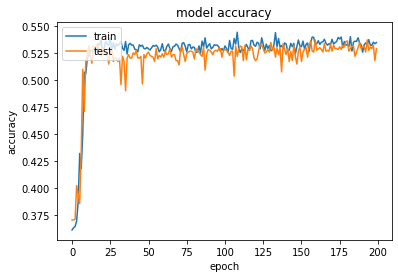

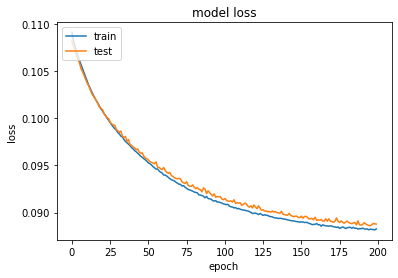

In [420]:
# 변수
input_shape = (8, )

# layer 쌓기
mlp_model = models.Sequential()
mlp_model.add(layers.Dense(units = 100, activation = 'elu', input_shape=input_shape))
mlp_model.add(layers.Dense(units = 200, activation = 'elu'))
mlp_model.add(layers.Dense(units = 10, activation = 'elu'))
mlp_model.add(layers.Dense(units = 3, activation = 'softmax'))

# 모델 설정
mlp_model.compile(optimizer='sgd', loss = 'mean_squared_logarithmic_error', metrics=['accuracy'])

# NN 정보 출력
mlp_model.summary()

# fit, 평가
history = mlp_model.fit(trnx, trnyOneHot, validation_data = [tstx, tstyOneHot], batch_size=100, epochs=200)

# 정확도 그래프 표시
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# 손실 그래프 표시
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

__Classifier A, Classifier B의 accuracy 비교__

In [423]:
print('Sklearn classifier A : ', accuracy_score(tstyOneHot, tsty_hat))
print('Keras classifier B : ', history.history['val_acc'][-1])
print('Gap : ', history.history['val_acc'][-1] - accuracy_score(tstyOneHot, tsty_hat))

Sklearn classifier A :  0.37559808612440193
Keras classifier B :  0.5295055706345103
Gap :  0.15390748451010838
